In [9]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
from datetime import date
%matplotlib inline
path_db = r"S:\Warehouse dept\Inventory control\Reporting and dashboards\Bin's Counting DUBAI\DUBAI\DATABASE\countings_dubai.db"
today = str(date.today())

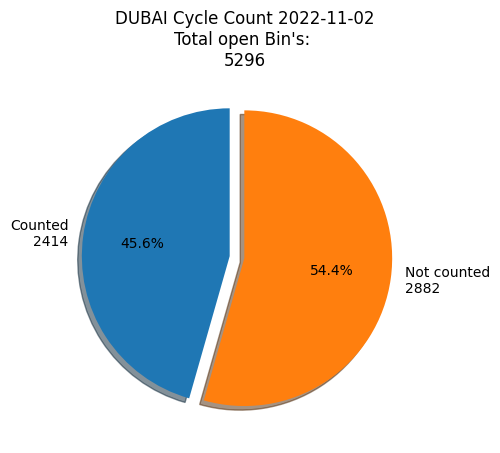

In [10]:

conn = sqlite3.connect(path_db)
query_counted = "SELECT COUNT(*) FROM countings WHERE Counted > 0"
query_notcounted = "SELECT COUNT(*) FROM countings WHERE Counted = 0"
total = 5296
curs = conn.cursor()
curs.execute(query_counted)
cnt = curs.fetchone()[0]
curs.execute(query_notcounted)
ncnt = curs.fetchone()[0]
plt.title(f"DUBAI Cycle Count {today}\nTotal open Bin's: \n{total}")
mylabels = [f'Counted\n{total - ncnt}', f'Not counted\n{total-cnt}']
myexplode = [0.1,0]
mydata = [cnt,ncnt]
plt.pie(mydata, labels=mylabels, explode=myexplode, shadow=True, autopct='%1.1f%%', startangle=90)
plt.savefig(f"./Reports/DUBAICounting_{str(today)}.pdf", format = 'pdf', bbox_inches="tight")
plt.show()